# Python 2 tutorial (modules)

Python is a programming language that is flexible and extendible. As a consequence, many libraries are now available. These libraries are provided as "packages" which contain modules that can be reused using an "import module_name" statement. Also, if you have not noted it yet, we are using a special "version" of Python, called IPython. Without it, you would not be able to use this nice browser interface provided by Jupyter (a migration of the "Ipython notebooks" project) to run code interactively. 

## Example data fitting and plotting with Numpy and Matplotlib

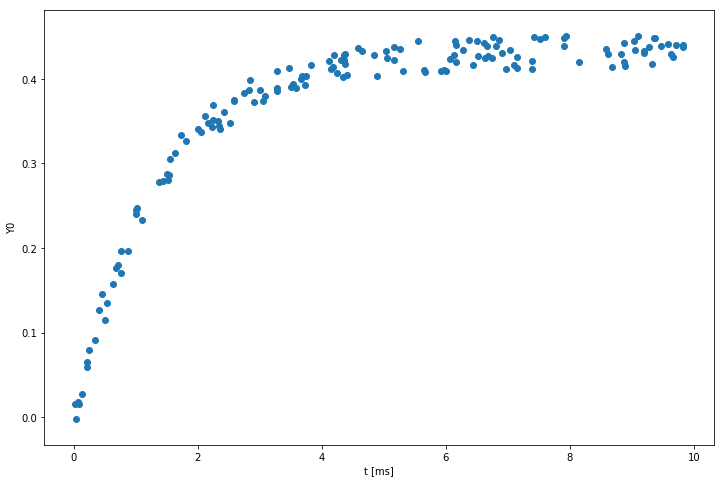

In [92]:
# Import Numpy (numeric library) and Matplotlib (plotting library).
# See http://wiki.scipy.org/NumPy_for_Matlab_Users
import numpy as np
import matplotlib.pyplot as plt

import requests
import os 

# IPython magic command: plots will be generated inline instead of in a separated window.
# See http://ipython.org/ipython-doc/dev/interactive/magics.html
%matplotlib inline

# Apparently we can not load the data files and then call them as is normally done.
# We have to call the data from a github repository
# I did this way, but I will check if we can find another better way
# Load data, as a big string - didn't find better way from github repository
r = requests.get('https://raw.githubusercontent.com/NataliBarros/InSilicoNeuroscienceCourse/master/data1.txt')
data = r.text

# Organize data
data_split = data.split('\n')
xdata = []
ydata = []
for d in range(1,len(data_split)-1):
    xdata.append(float(data_split[d].split('\t')[0]))
    ydata.append(float(data_split[d].split('\t')[1]))
    
# print xdata
# print ydata

################################### MICHAEL
# rt = r.text
# print rt
# data = np.array([map(float, _ln.split()) for _ln in rt.split('\n')[1:]])
# print data
#################################

# # Plot data
fig0, ax = plt.subplots(figsize=(12,8))
ax.scatter(xdata, ydata)
ax.set_xlabel('t [ms]')
ax.set_ylabel('Y0')

In [ ]:
# We will use the function "curve_fit", that can be found in the module "optimize" of the library "SciPy"

from scipy.optimize import curve_fit

def expcurve(x, a):
    '''A model'''
    return 1 - a*np.exp(-x)

def betterexpcurve(x, a, b, c):
    '''A better model'''
    return a - b*np.exp(-x*c)


# Fit model
popt, pcov = curve_fit(betterexpcurve, xdata, ydata)

# Standard deviation errors on the parameters, see curve_fit documentation
perr = np.sqrt(np.diag(pcov))

# Generate data from the model
x = np.linspace(min(xdata)-1, max(xdata)+1)
y = betterexpcurve(x, *popt)

# Plot raw data and model
fig1, ax = plt.subplots(figsize=(12,8))
ax.scatter(xdata, ydata, label='Raw Data')
ax.plot(x,y, '--g', lw=3, label='Model')
ax.set_xlabel('t [ms]')
ax.set_ylabel('Y0')
ax.legend(loc=2)